<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Metropolis_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metropolis-Hastings 1D**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

1.   exponencial
2.   triangular
3.   Cauchy

# *1. Distribución exponencial*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: f(x) = λ$e^{-λx}$

Parametro λ>0

In [23]:
#funcion de densidad
def exp(x,lamda):
  return np.where(x >= 0, lamda*np.exp(-lamda*x), 0)

In [24]:
#parametros de la función
lamda = 0.5
delta=0.1  # Entre mas grande sea delta la aceptación es menor


In [35]:
n_exponencial = 5000  # Número de iteraciones
x_1 = np.zeros(n_exponencial)  # Vector para los valores generados
x_1[0] = 2
acept_1 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_exponencial-1):
    y_1 = x_1[i] + np.random.uniform(-delta, delta)  # suma x_[i] + un valor aletorio entre (-0.1,0.1)

    if np.random.rand() < min(1, exp(y_1, lamda) / exp(x_1[i],lamda)):  # Condicion de metropolis hastings
        x_1[i+1] = y_1
        acept_1 += 1
    else:
        x_1[i+1] = x_1[i]

print("La aceptación fue del", acept_1/n_exponencial*100, "%")


La aceptación fue del 89.98 %


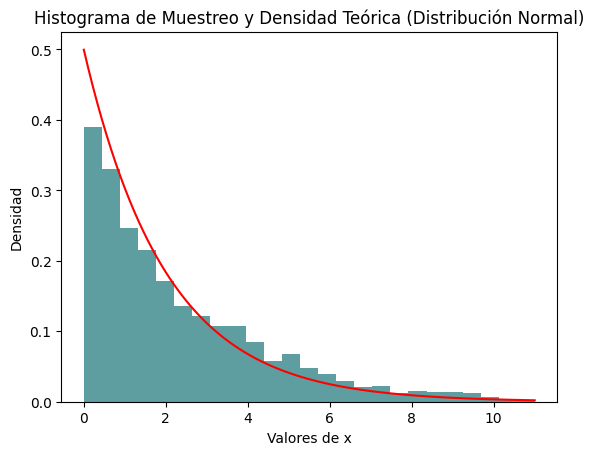

In [43]:
plt.hist(x_1,density=True,color='cadetblue',bins=25)
xs=np.linspace(min(x_1), max(x_1),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs,exp(xs,lamda),color='red')
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Normal)')
plt.show()

> ***Media y Varianza***

Media(μ):	$fraccion(1,λ)$

Como lamda=0.5 entonces la media es 1/0.5=2

Varianza:	$1/λ^2$




Ejercicio con distribucion de Cauchy

In [26]:
def f(x,gamma,x0):
  return 1/((np.pi*gamma)*(1+((x-x0)/gamma)**2))

In [27]:
# Parametros que cambian
x0 = 0.2
gamma = 0.1

In [28]:
delta = 0.5

In [29]:
n = 50000  # n tiene que ser muy grande
x = np.zeros(n)
x[0] = 0  # Valor inicial
acept = 0

for i in range(0,n-1):
  y = x[i] + np.random.uniform(-delta,delta)
  if np.random.rand()<min(1,f(y,gamma,x0)/f(x[i],gamma,x0)):
    x[i+1]=y
    acept += 1
  else:
    x[i+1] = x[i]
print("La aceptacion fue del", acept/n*100,"%")

La aceptacion fue del 48.398 %


Text(0.5, 1.0, 'Distribución de Cauchy')

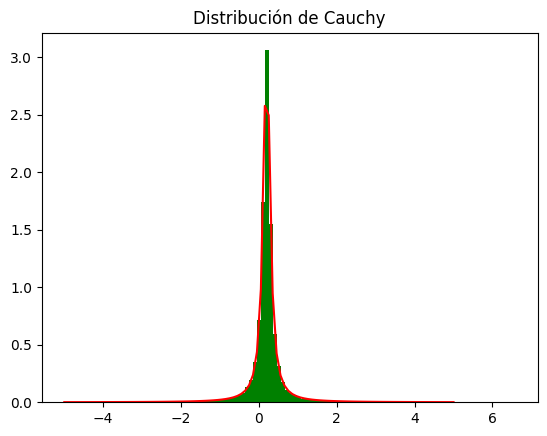

In [30]:
plt.hist(x,density = True, bins=100, color='green')
xs = np.linspace(-5,5,100)
plt.plot(xs,f(xs,gamma,x0), color='red')
plt.title('Distribución de Cauchy')

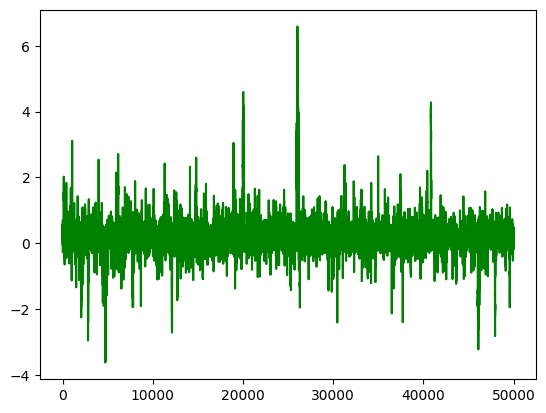

In [31]:
plt.plot(x, color='green')

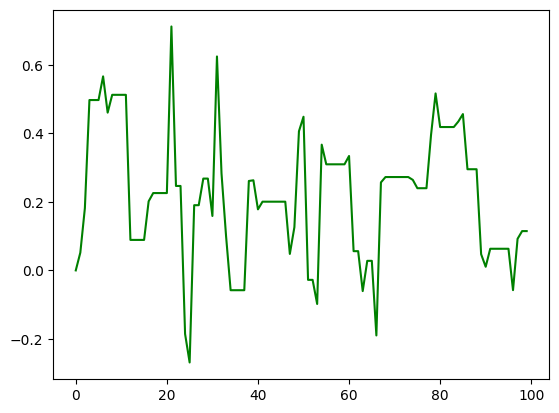

In [32]:
plt.plot(x[:100], color='green')